Activity 1.2
An alternative to the Fashion MNIST dataset is the Digit MNIST dataset which we have seen from another example. Your task is to load the dataset using the function below, and using a CNN build a classifier for judging the digit of an input using proper model validation, scaling and metrics.

Then, try creating an image yourself to test the model out! You will need to use Microsoft Paint (or equivilent) and ensure the size of the image is correct with the input!

In [60]:
# Import tensorflow and keras, you need condo for this
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, InputLayer
from tensorflow.keras.utils import to_categorical

# Commonly used modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn tools
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, f1_score

In [61]:
# The function below will load the dataset.
# For information about the dataset, go to the url below:
# https://keras.io/api/datasets/mnist/
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

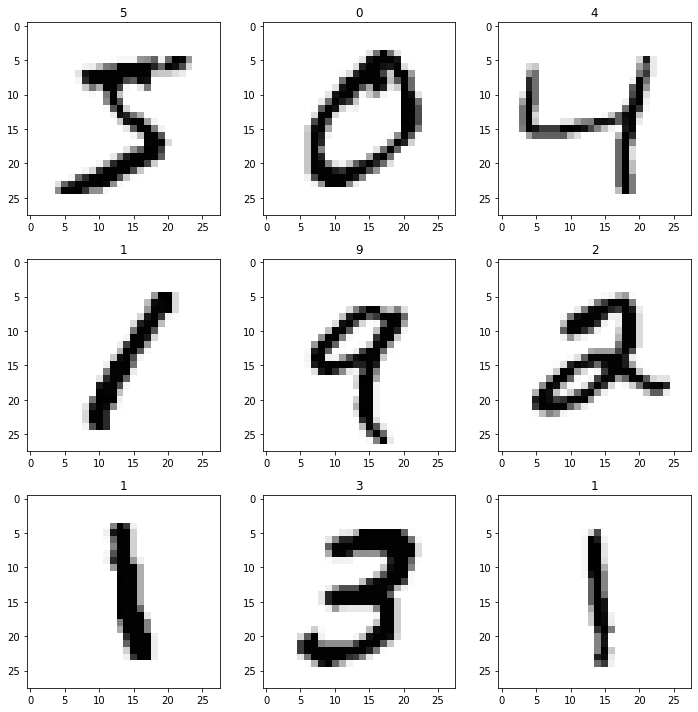

In [62]:
# Plot some images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for idx, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[idx], cmap='Greys')
    ax.set_title(y_train[idx])

plt.tight_layout()
plt.show()

In [63]:
# One hot encode y_train, y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [64]:
# Reshape so 1 image is one sample
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [65]:
# Finally scale to (0, 1)
x_train = x_train.astype("float32") / 255
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
print(x_train.shape)
x_test = x_test.astype("float32") / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

(60000, 28, 28, 1)


In [66]:
model = keras.Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
	    Dense(100, activation='relu'),
	    Dense(10, activation='softmax')
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [67]:
 
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=0)
#evaluate model
#history = model.fit(x_train, 
                    #y_train, 
                    #epochs=1, 
                   #batch_size=1,
                    #verbose=1, 
                   #validation_split=0.)

In [68]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.132481,0.960167,0.055492,0.9814
1,0.042833,0.986950,0.034851,0.9883
2,0.029850,0.990233,0.033420,0.9890
3,0.021767,0.992917,0.033140,0.9898
4,0.016604,0.994567,0.030327,0.9906
5,0.012805,0.996133,0.036972,0.9888
6,0.011199,0.996183,0.038040,0.9895
7,0.009912,0.996850,0.040073,0.9882
8,0.006993,0.997800,0.043764,0.9889
9,0.006716,0.997767,0.034317,0.9915


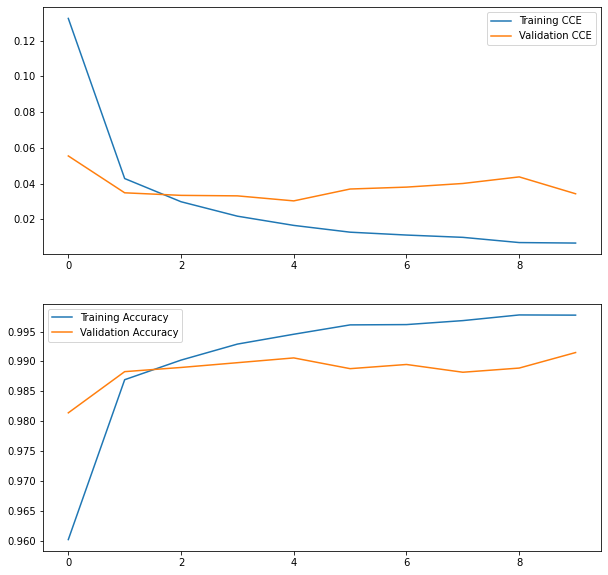

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(history_df['loss'], label="Training CCE")
ax1.plot(history_df['val_loss'], label='Validation CCE')
ax1.legend()

ax2.plot(history_df['accuracy'], label="Training Accuracy")
ax2.plot(history_df['val_accuracy'], label="Validation Accuracy")
ax2.legend()

plt.show()

In [70]:
y_predict = model.predict(x_test)

# Let's take a look at y_predict
print(y_predict[0])

# Argmax along the rows
y_predict = np.argmax(y_predict, axis=1)
y_test = np.argmax(y_test, axis=1)

print(y_predict[0])
# Here we use mean absolute error to get an intepretable value.
print("F1 Score:", f1_score(y_predict, y_test, average='macro'))

[9.2194366e-14 2.1096520e-11 9.4774640e-11 4.9777111e-09 1.0687975e-11
 5.7739588e-13 4.1420828e-17 1.0000000e+00 2.7993803e-11 9.8964870e-10]
7
F1 Score: 0.9914699493006003


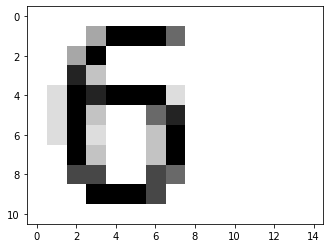

In [71]:
#Take in my test image from outside
import matplotlib.image as mpimg
img = mpimg.imread('my_image_vs.png')
imgplot = plt.imshow(img)
plt.show()

In [79]:
#Try the predictor
import cv2
import numpy as np
img = cv2.imread("my_image_vs.png",0)
img = cv2.resize(img, (28, 28))
img = np.reshape(img, [1, 28, 28, 1])
print(np.argmax(model.predict(img)))

3


In [ ]:
#I thought it was a 6